<a href="https://colab.research.google.com/github/satyam-gfg/Email-Spam-Detector/blob/master/Copy_of_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RP-1

In [ ]:
# Step 2: Install dependencies
!pip install -q efficientnet keras_preprocessing

# Step 2: Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Step 3: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
import os


In [ ]:
# Step 4: Set path
data_dir = '/content/drive/MyDrive/DR_dataset/train'
img_size = 380  # EfficientNetB4 default
batch_size = 16
num_classes = 5

In [ ]:
# Step 5: Preprocess and split data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
# Step 6: Create model with EfficientNetB4
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

# Parameters
img_size = 380
batch_size = 16
num_classes = 5  # Based on DR stages

# Load base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Unfreeze all layers for full fine-tuning
base_model.trainable = True

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save the trained model to a file
model.save('/content/drive/MyDrive/DR_dataset.h5') # Moving the save command here

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

# Parameters
img_size = 380
batch_size = 16
num_classes = 5  # Based on DR stages

# Load base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Unfreeze more layers for fine-tuning
for layer in base_model.layers[-100:]:  # Adjust the number of layers to unfreeze
         layer.trainable = True

# Example using SGD with momentum
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 380, 380,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 380, 380,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 380, 380,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 380, 380,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 381, 381,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 190, 190,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 190, 190,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 190, 190,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 190, 190,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 190, 190,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 190, 190,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 190, 190,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 190, 190,  │      1,152 │ block1a_se_excit

 Total params: 17,682,788 (67.45 MB)

 Trainable params: 17,557,581 (66.98 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 380
batch_size = 32

train_datagen = ImageDataGenerator(
         rescale=1./255,
         rotation_range=30,  # Increased rotation range
         width_shift_range=0.2, # Added width shift
         height_shift_range=0.2, # Added height shift
         shear_range=0.2, # Added shear
         zoom_range=0.2, # Increased zoom range
         horizontal_flip=True,
         fill_mode='nearest', # Added fill mode
         validation_split=0.2
     )

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DR_dataset/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DR_dataset/train',  # Use the same directory as train_generator
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1056s 12s/step - accuracy: 0.8450 - loss: 0.4133 - val_accuracy: 0.4473 - val_loss: 1.2742
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 644s 7s/step - accuracy: 0.8696 - loss: 0.3459 - val_accuracy: 0.5923 - val_loss: 1.0637
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 627s 7s/step - accuracy: 0.9049 - loss: 0.2718 - val_accuracy: 0.6402 - val_loss: 1.0016
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 625s 7s/step - accuracy: 0.9158 - loss: 0.2409 - val_accuracy: 0.7278 - val_loss: 0.8207
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 653s 6s/step - accuracy: 0.9239 - loss: 0.2048 - val_accuracy: 0.5198 - val_loss: 1.5990


In [ ]:
# Save the trained model to a file
model.save('/content/drive/MyDrive/DR_dataset.h5')

Saving 63a03880939c.jpeg to 63a03880939c.jpeg
Image shape: (1, 380, 380, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: Mild DR


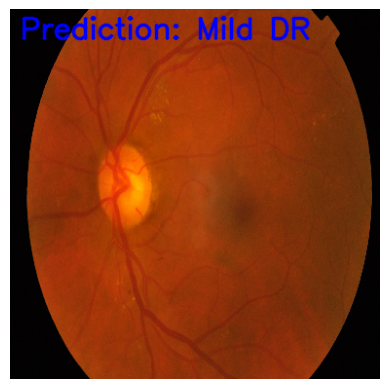

In [21]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Upload the image from your local device
uploaded = files.upload()

# Get the filename of the uploaded file
image_path = next(iter(uploaded))

# Define the target size for the image - Use the same size as during training (380x380)
img_size = 380  # Changed from 224 to 380

# Load the image and resize it to the target size
img = image.load_img(image_path, target_size=(img_size, img_size))

# Convert the image to an array and normalize it
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Check the image shape
print(f"Image shape: {img_array.shape}")

# Load your trained model (assuming you've already saved it as 'DR_dataset.h5')
model = tf.keras.models.load_model('/content/drive/MyDrive/DR_dataset.h5')

# Make a prediction on the uploaded image
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)[0]

# Assuming you have a list of class labels (replace this with your actual class labels)
class_labels = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR']  # Example, change as needed

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class]}")

# Display the image with the prediction overlaid
# Convert the PIL Image to an OpenCV image
img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Put the prediction text on the image
cv2.putText(img_cv2, f"Prediction: {class_labels[predicted_class]}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)  # Blue color

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

RP-2

RP-3

RP-6